Oversampling for Imbalanced Classification

Imbalanced datasets are those where there is a severe skew in class distributions, this skewness cause an bias in our training dataset that can influence our machine learning algorithm to ignore the minority class entirely.

One approach to addressing this problem it is randomly resample the dataset.

There are two main approaches to random sampling for imbalanced classification, oversampling and undersampling.
* Random Oversampling: Randomly duplicate examples in the minority class.
* Random Undersampling: Randomly delete examples in the majority class.


Let's focus on oversampling, this technique can be effective for machine learning algorithms that are affected by skewed distributions and multiple duplicated examples.

**In some cases** seeking a balanced distribuition for a severely imbalanced dataset can cause affected algorithms to **overfit** the **minority class**.

In this notebook i created a simple pipeline for some classification algorithms, this algorithms can get more improvements using GridSearch or KFolds.

We are using labeled4.csv, perhaps due to the low data set, I can say that we cannot obtain very pleasant results, but we can show some methods that we can use later in other label files.

In [0]:
#pip install scikit-plot # plotting roc_curve

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from gensim import utils
import gensim.parsing.preprocessing as gsp
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE, SMOTENC
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

In [0]:
df = pd.read_csv('/content/labeled4.csv')

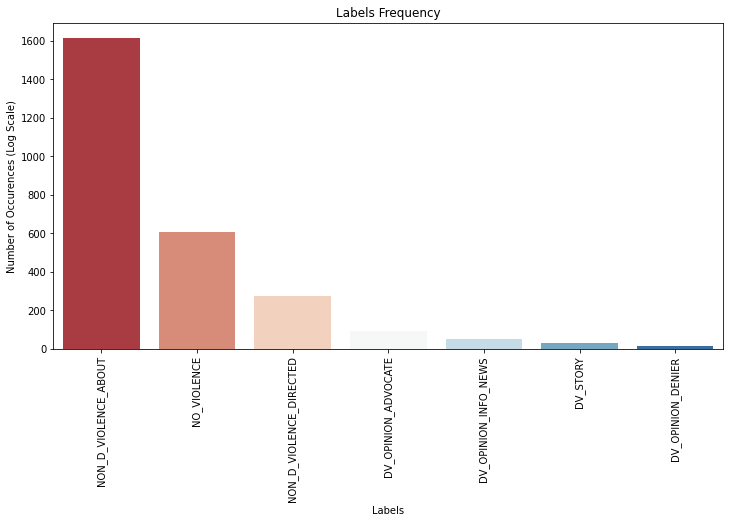

In [4]:
plt.figure(figsize = (12,6))
chart = sns.countplot(x = 'lab_final', data = df, palette = 'RdBu', order = df['lab_final'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Labels')
chart.set_ylabel('Number of Occurences (Log Scale)')
chart.set_title('Labels Frequency')
plt.show()

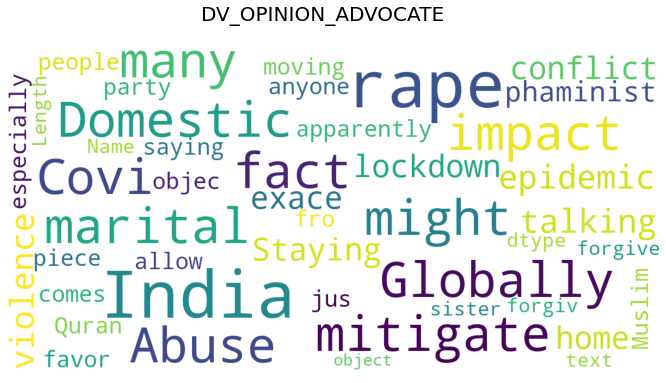

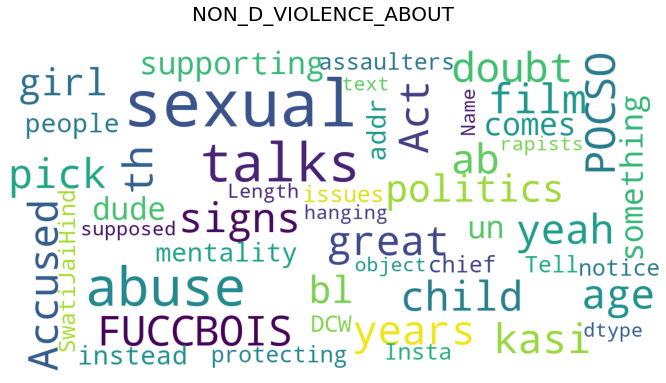

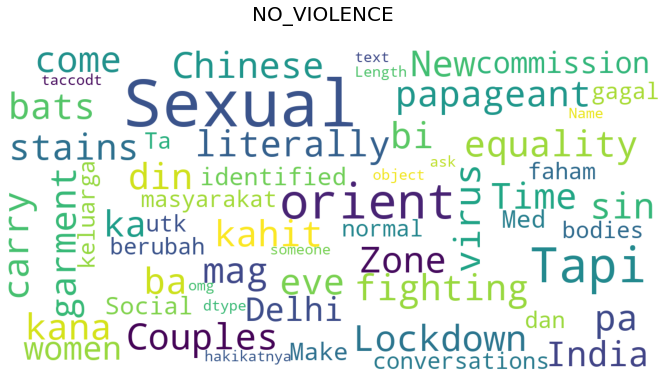

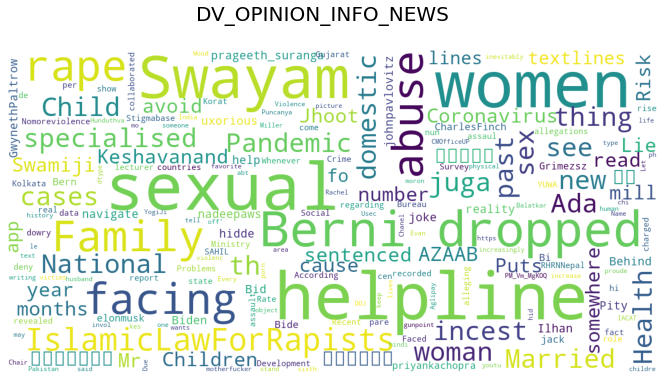

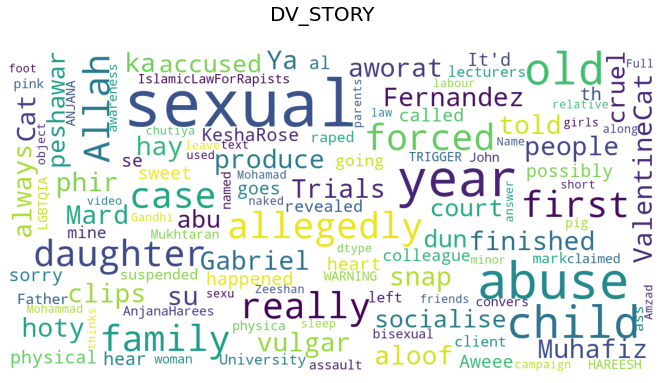

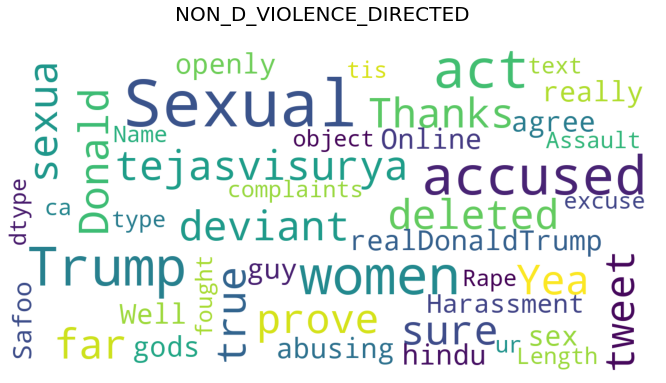

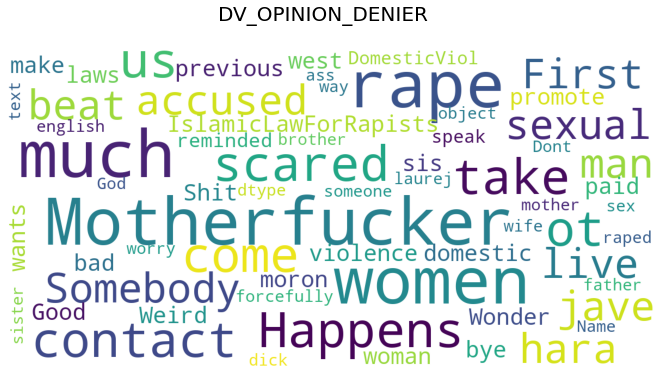

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        

    plt.imshow(wordcloud)
    plt.show()

stopwords = set(STOPWORDS)
labels = df['lab_final'].unique()
for label in labels:
  wordcloud = df[df['lab_final'] == label]['text']
  show_wordcloud(wordcloud, title = label)

In [0]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

df['text'] = df['text'].apply(clean_text)
#df_1['text'] = df_1['text'].apply(clean_text)

### Splitting data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
   df['text'], df['lab_final'], test_size=0.30, random_state=42)

In [0]:
def create_pipeline(method,classifier):
  pipeline = make_pipeline_imb(TfidfVectorizer(max_features = 100000, ngram_range = (1,3)),
                             method, classifier)
  return pipeline 

def evaluate_pipeline(pipeline, X_train, X_test, y_train, y_test, classifier_name = ''):
  pipeline.fit(X_train, y_train)
  pipeline_predictions = pipeline.predict(X_test)
  evaluation = f1_score(y_test, pipeline_predictions, average='weighted') * 100
  evaluation_formatted = round(evaluation, 2)
  print(f"This {classifier_name} Classifier got an accuracy of: {evaluation_formatted}%")
  print(classification_report_imbalanced(y_test,  pipeline_predictions))
  y_probas = pipeline.predict_proba(X_test)
  skplt.metrics.plot_roc_curve(y_test, y_probas, figsize = (12,8))
  plt.show()

### RandomOverSampling

This Logistic Regression Classifier got an accuracy of: 76.37%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.64      0.47      0.99      0.55      0.69      0.45        19
      DV_OPINION_DENIER       0.00      0.00      1.00      0.00      0.00      0.00         7
   DV_OPINION_INFO_NEWS       0.67      0.24      1.00      0.35      0.48      0.22        17
               DV_STORY       0.33      0.20      1.00      0.25      0.45      0.18         5
   NON_D_VIOLENCE_ABOUT       0.81      0.90      0.69      0.85      0.79      0.64       478
NON_D_VIOLENCE_DIRECTED       0.55      0.39      0.96      0.45      0.61      0.35        90
            NO_VIOLENCE       0.79      0.78      0.94      0.79      0.86      0.72       188

            avg / total       0.76      0.78      0.80      0.76      0.77      0.60       804



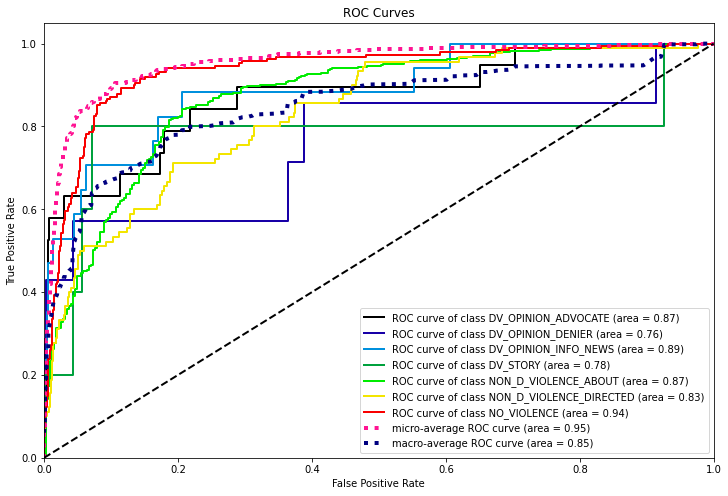

This Naive Bayes Classifier got an accuracy of: 66.49%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.14      0.63      0.91      0.24      0.76      0.56        19
      DV_OPINION_DENIER       0.40      0.29      1.00      0.33      0.53      0.26         7
   DV_OPINION_INFO_NEWS       0.14      0.47      0.94      0.21      0.66      0.42        17
               DV_STORY       0.03      0.20      0.95      0.04      0.44      0.18         5
   NON_D_VIOLENCE_ABOUT       0.85      0.62      0.84      0.72      0.72      0.51       478
NON_D_VIOLENCE_DIRECTED       0.45      0.54      0.91      0.49      0.71      0.48        90
            NO_VIOLENCE       0.79      0.68      0.95      0.73      0.80      0.62       188

            avg / total       0.75      0.62      0.88      0.66      0.73      0.53       804



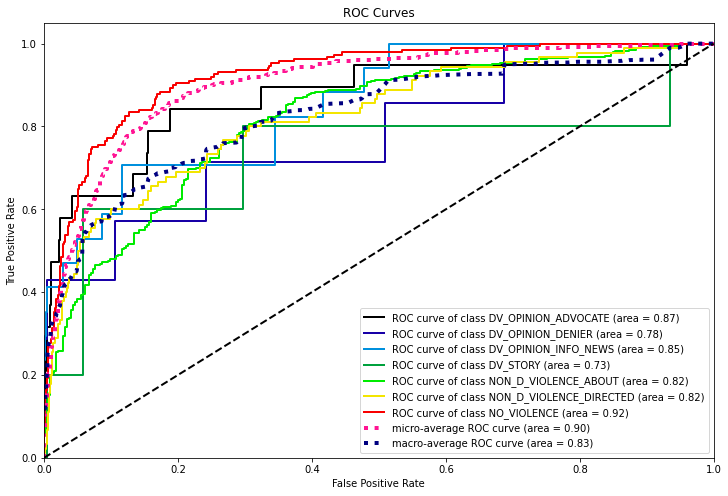

This Random Forest Classifier Classifier got an accuracy of: 72.94%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.57      0.21      1.00      0.31      0.46      0.19        19
      DV_OPINION_DENIER       1.00      0.29      1.00      0.44      0.53      0.27         7
   DV_OPINION_INFO_NEWS       0.80      0.24      1.00      0.36      0.48      0.22        17
               DV_STORY       0.00      0.00      1.00      0.00      0.00      0.00         5
   NON_D_VIOLENCE_ABOUT       0.78      0.92      0.61      0.84      0.75      0.58       478
NON_D_VIOLENCE_DIRECTED       0.71      0.11      0.99      0.19      0.33      0.10        90
            NO_VIOLENCE       0.76      0.85      0.92      0.80      0.88      0.77       188

            avg / total       0.76      0.77      0.75      0.73      0.72      0.55       804



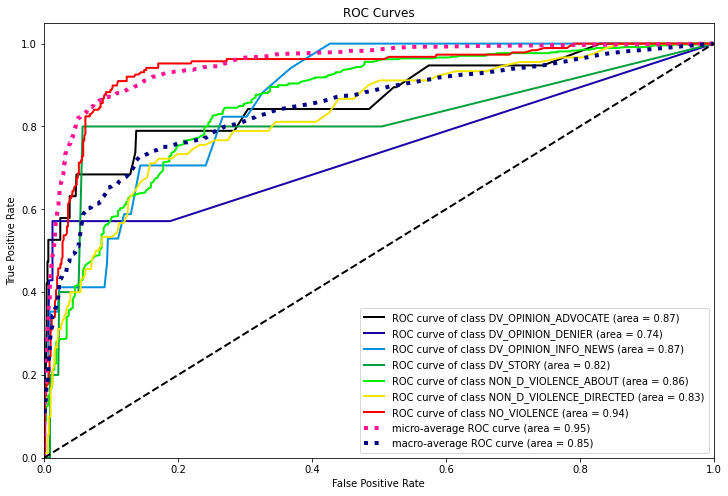

In [9]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=300)
#sgdc = SGDClassifier(penalty='l2',alpha=1e-3, random_state=101)
rfc = RandomForestClassifier(n_estimators=500, n_jobs = -1, random_state = 101)
nb = MultinomialNB()
classifiers = [lr,nb, rfc]
classifiers_name = ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
i = 0
for classifier in classifiers:
  pipe = create_pipeline(RandomOverSampler(random_state = 101), classifier)
  pipe = create_pipeline(RandomOverSampler(random_state = 101), classifier)
  evaluate_pipeline(pipe,X_train, X_test, y_train, y_test, classifier_name=classifiers_name[i])
  i += 1

## SMOTE (Synthetic Minority Oversampling Technique)

This Logistic Regression Classifier got an accuracy of: 75.74%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.69      0.47      0.99      0.56      0.69      0.45        19
      DV_OPINION_DENIER       0.00      0.00      1.00      0.00      0.00      0.00         7
   DV_OPINION_INFO_NEWS       0.57      0.24      1.00      0.33      0.48      0.22        17
               DV_STORY       0.33      0.20      1.00      0.25      0.45      0.18         5
   NON_D_VIOLENCE_ABOUT       0.80      0.90      0.67      0.85      0.78      0.62       478
NON_D_VIOLENCE_DIRECTED       0.53      0.37      0.96      0.43      0.59      0.33        90
            NO_VIOLENCE       0.80      0.77      0.94      0.78      0.85      0.71       188

            avg / total       0.75      0.77      0.79      0.76      0.76      0.59       804



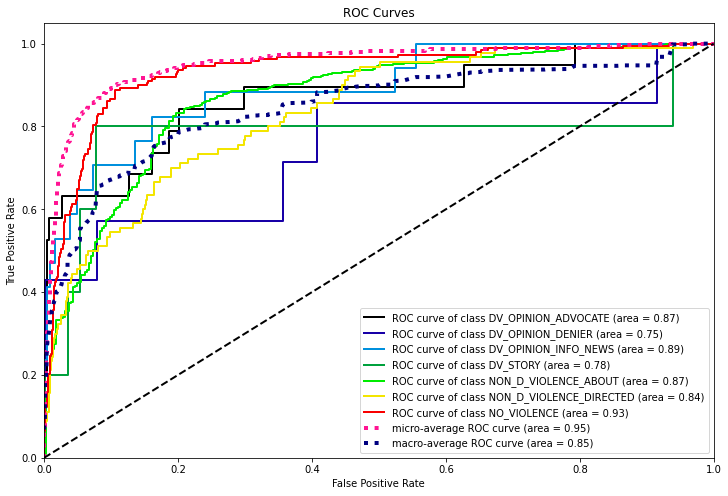

This Naive Bayes Classifier got an accuracy of: 64.97%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.16      0.68      0.91      0.26      0.79      0.61        19
      DV_OPINION_DENIER       0.00      0.00      1.00      0.00      0.00      0.00         7
   DV_OPINION_INFO_NEWS       0.14      0.53      0.93      0.22      0.70      0.47        17
               DV_STORY       0.05      0.40      0.95      0.09      0.62      0.36         5
   NON_D_VIOLENCE_ABOUT       0.85      0.60      0.84      0.70      0.71      0.49       478
NON_D_VIOLENCE_DIRECTED       0.44      0.59      0.90      0.50      0.73      0.52        90
            NO_VIOLENCE       0.77      0.65      0.94      0.71      0.78      0.60       188

            avg / total       0.74      0.60      0.88      0.65      0.72      0.52       804



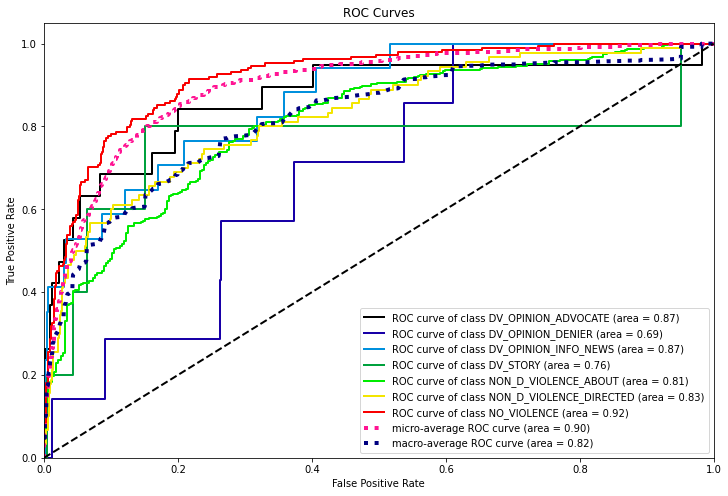

This Random Forest Classifier Classifier got an accuracy of: 70.91%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.75      0.16      1.00      0.26      0.40      0.14        19
      DV_OPINION_DENIER       0.00      0.00      1.00      0.00      0.00      0.00         7
   DV_OPINION_INFO_NEWS       0.80      0.24      1.00      0.36      0.48      0.22        17
               DV_STORY       0.00      0.00      1.00      0.00      0.00      0.00         5
   NON_D_VIOLENCE_ABOUT       0.75      0.93      0.55      0.83      0.72      0.53       478
NON_D_VIOLENCE_DIRECTED       0.54      0.08      0.99      0.14      0.28      0.07        90
            NO_VIOLENCE       0.79      0.80      0.93      0.79      0.86      0.73       188

            avg / total       0.73      0.76      0.72      0.71      0.68      0.50       804



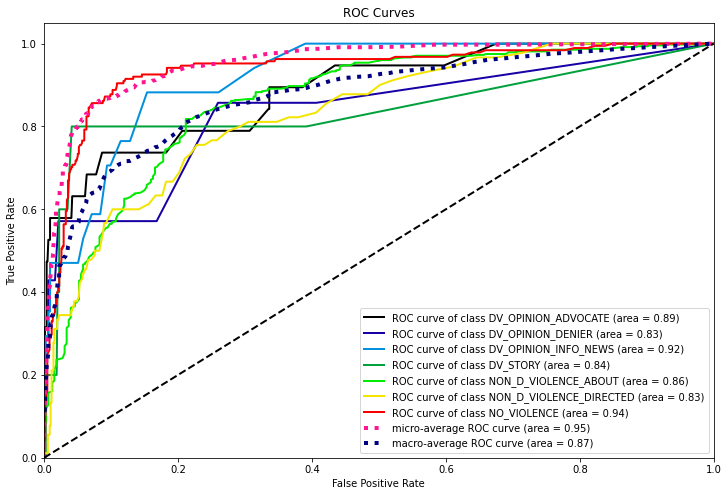

In [10]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100)
#sgdc = SGDClassifier(penalty='l2',alpha=1e-3, random_state=101)
rfc = RandomForestClassifier(n_estimators=500, n_jobs = -1, random_state = 101)
nb = MultinomialNB()
classifiers = [lr,nb, rfc]
classifiers_name = ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
i = 0

for classifier in classifiers:
  pipe = create_pipeline(SMOTE(sampling_strategy = 'not minority', random_state = 101), classifier)
  evaluate_pipeline(pipe,X_train, X_test, y_train, y_test, classifier_name=classifiers_name[i])
  i += 1

This Logistic Regression Classifier got an accuracy of: 75.48%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.64      0.47      0.99      0.55      0.69      0.45        19
      DV_OPINION_DENIER       0.00      0.00      1.00      0.00      0.00      0.00         7
   DV_OPINION_INFO_NEWS       0.57      0.24      1.00      0.33      0.48      0.22        17
               DV_STORY       0.33      0.20      1.00      0.25      0.45      0.18         5
   NON_D_VIOLENCE_ABOUT       0.82      0.88      0.71      0.84      0.79      0.63       478
NON_D_VIOLENCE_DIRECTED       0.50      0.34      0.96      0.41      0.57      0.31        90
            NO_VIOLENCE       0.76      0.82      0.92      0.79      0.87      0.75       188

            avg / total       0.75      0.77      0.80      0.75      0.77      0.60       804



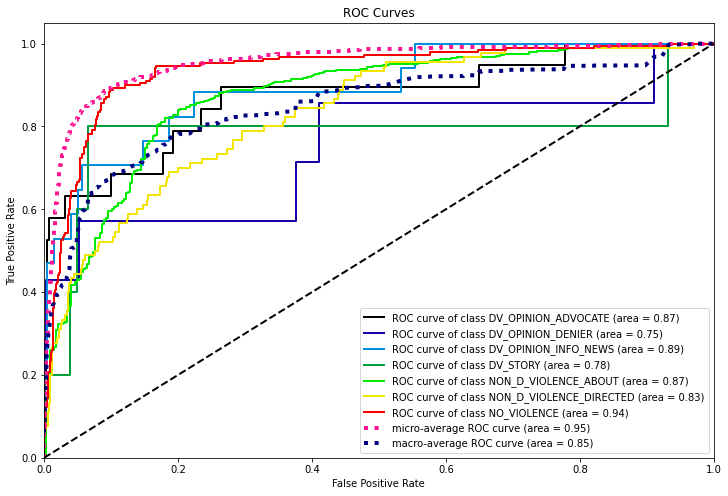

This Naive Bayes Classifier got an accuracy of: 63.58%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.13      0.58      0.90      0.21      0.72      0.51        19
      DV_OPINION_DENIER       0.40      0.29      1.00      0.33      0.53      0.26         7
   DV_OPINION_INFO_NEWS       0.12      0.47      0.93      0.20      0.66      0.42        17
               DV_STORY       0.05      0.40      0.96      0.10      0.62      0.36         5
   NON_D_VIOLENCE_ABOUT       0.87      0.55      0.87      0.68      0.70      0.47       478
NON_D_VIOLENCE_DIRECTED       0.39      0.53      0.90      0.45      0.69      0.46        90
            NO_VIOLENCE       0.74      0.72      0.92      0.73      0.81      0.65       188

            avg / total       0.74      0.59      0.89      0.64      0.72      0.51       804



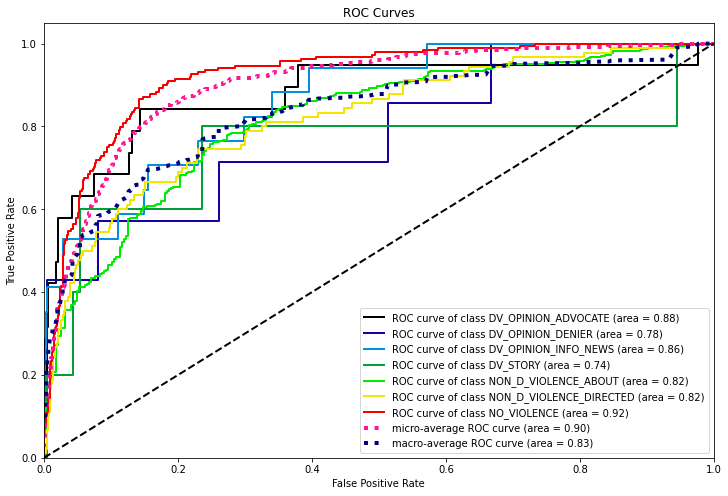

This Random Forest Classifier Classifier got an accuracy of: 71.09%
                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.80      0.21      1.00      0.33      0.46      0.19        19
      DV_OPINION_DENIER       1.00      0.14      1.00      0.25      0.38      0.13         7
   DV_OPINION_INFO_NEWS       0.80      0.24      1.00      0.36      0.48      0.22        17
               DV_STORY       0.00      0.00      1.00      0.00      0.00      0.00         5
   NON_D_VIOLENCE_ABOUT       0.75      0.93      0.55      0.83      0.72      0.53       478
NON_D_VIOLENCE_DIRECTED       0.50      0.06      0.99      0.10      0.23      0.05        90
            NO_VIOLENCE       0.79      0.80      0.94      0.80      0.87      0.74       188

            avg / total       0.73      0.76      0.72      0.71      0.68      0.51       804



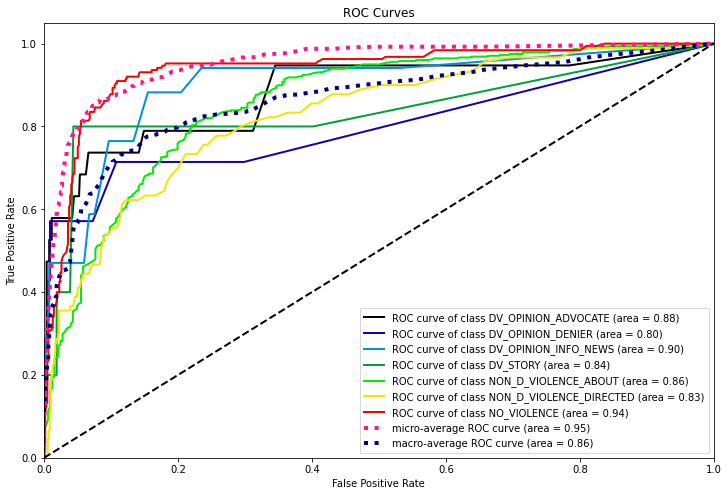

In [11]:
i = 0

for classifier in classifiers:
  pipe = create_pipeline(ADASYN(random_state = 101), classifier)
  evaluate_pipeline(pipe,X_train, X_test, y_train, y_test, classifier_name=classifiers_name[i])
  i += 1

### References
[Oversampling](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)

[imblearn](https://imbalanced-learn.readthedocs.io/en/stable/index.html)